### 矢量计算与标量计算的时间比较

In [1]:
from mxnet import nd
from time import time

a = nd.ones(shape=1000)
b = nd.ones(shape=1000)

start = time()
c = nd.zeros(shape=1000)
for i in range(1000):
    c[i] = a[i] + b[i]
    
time() - start

0.10904860496520996

In [3]:
start = time()
d = a + b
time() - start

0.0009989738464355469

## 线性回归的从零开始实现

In [4]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

### 生成数据集
设训练数据集样本数为1000，输入个数（特征数）为2， 给定随机生成的批量样本特征$X\in\mathbb{R}^{1000\times2}$  
使用线性回归模型真实权重$w=[2, -3.4]^{T}$和偏差$b=4.2$，以及一个随机噪声项$\epsilon$来生成标签：  
$$y = Xw + b + \epsilon$$

In [10]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2

features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:,0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [11]:
features[0], labels[0]

(
 [ 1.4642214 -1.3058136]
 <NDArray 2 @cpu(0)>, 
 [11.562276]
 <NDArray 1 @cpu(0)>)

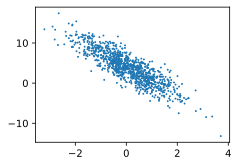

In [16]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
    
def set_figsize(figsize = (3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);  # 加分号只显示图